### RUNOFF DATA is in liter per squared meter and so for a 25 squared kilometer zone

Analyzing runoff data in: hydro1.csv


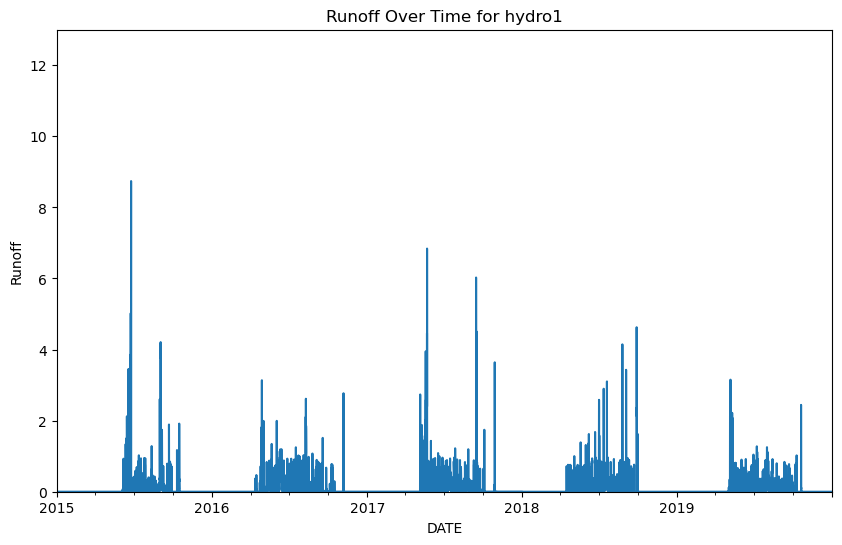

count    43824.000000
mean         0.088421
std          0.276395
min          0.000000
25%          0.000000
50%          0.002310
75%          0.048662
max          8.741140
Name: RUNOFF, dtype: float64
sum: 3874.94943
Missing values for hydro1: 0
Analyzing runoff data in: hydro2.csv


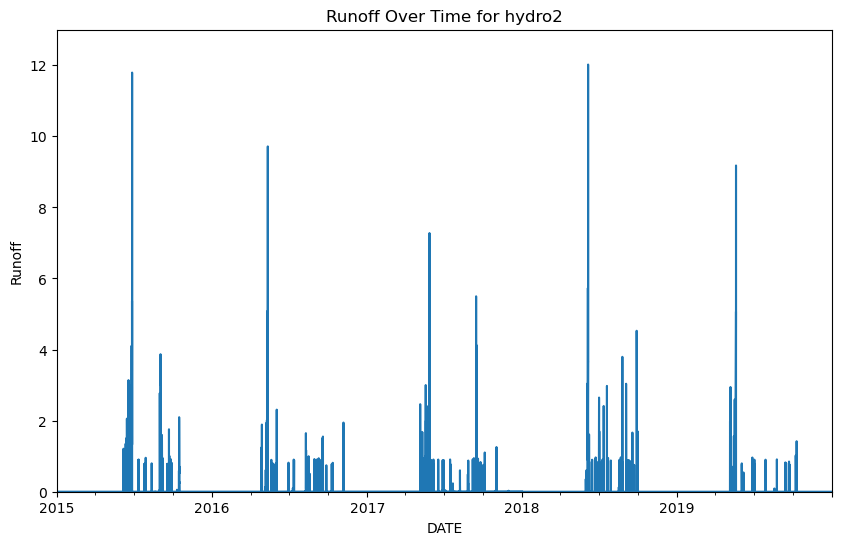

count    43824.000000
mean         0.036430
std          0.280978
min          0.000000
25%          0.000000
50%          0.001330
75%          0.003780
max         12.020070
Name: RUNOFF, dtype: float64
sum: 1596.5018499999999
Missing values for hydro2: 0
Analyzing runoff data in: hydro3.csv


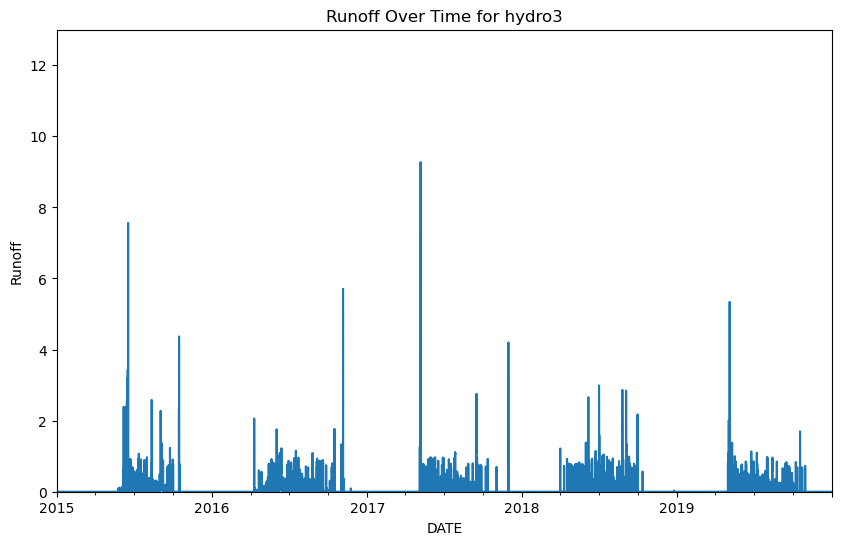

count    43824.000000
mean         0.072348
std          0.206266
min          0.000140
25%          0.000300
50%          0.000560
75%          0.045902
max          9.274630
Name: RUNOFF, dtype: float64
sum: 3170.59368
Missing values for hydro3: 0
Analyzing runoff data in: hydro4.csv


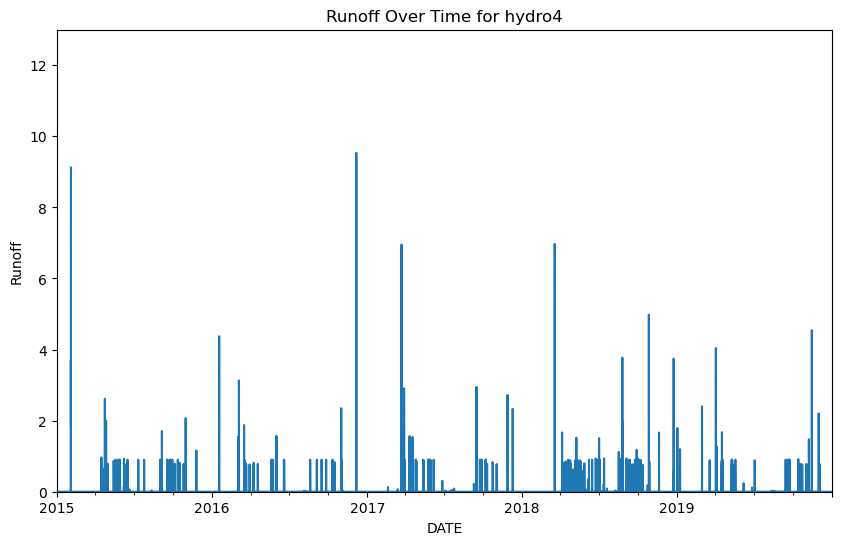

count    43824.000000
mean         0.010309
std          0.139861
min          0.000170
25%          0.000280
50%          0.000310
75%          0.000450
max          9.535190
Name: RUNOFF, dtype: float64
sum: 451.7811699999999
Missing values for hydro4: 0
Analyzing runoff data in: hydro5.csv


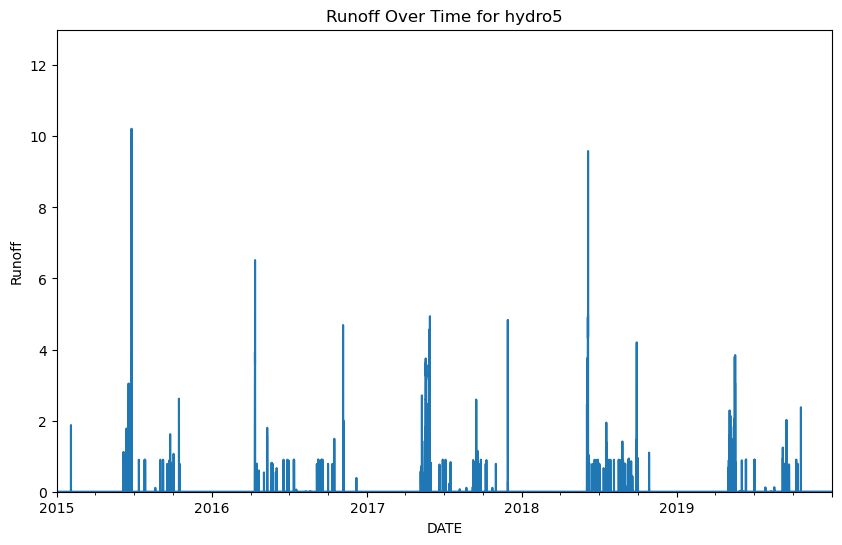

count    43824.000000
mean         0.029404
std          0.253844
min          0.000000
25%          0.000450
50%          0.000720
75%          0.001050
max         10.214350
Name: RUNOFF, dtype: float64
sum: 1288.5830799999999
Missing values for hydro5: 0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the CSV files are stored
input_dir = '../../data/hydro'

def analyze_runoff(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Manually construct the datetime string and convert it
    df['DATE'] = pd.to_datetime(df['YYY'].astype(str) + '-' +
                                df['MM'].astype(str).str.zfill(2) + '-' +
                                df['DD'].astype(str).str.zfill(2) + ' ' +
                                df['HH'].astype(str).str.zfill(2) + ':00:00')

    # Set DATE as the index
    df.set_index('DATE', inplace=True)

    # Plot and summarize runoff data for each unique NAME
    for location in df['NAME'].unique():
        df_location = df[df['NAME'] == location]
        plt.figure(figsize=(10, 6))
        ax = df_location['RUNOFF'].plot(title=f'Runoff Over Time for {location}')
        ax.set_ylabel('Runoff')
        ax.set_ylim(0, 13)  # Set the y-axis range from 0 to 13
        plt.show()

        # Print summary statistics for runoff
        print(df_location['RUNOFF'].describe())
        print(f'sum: {df_location["RUNOFF"].sum()}')
        print(f'Missing values for {location}: {df_location["RUNOFF"].isnull().sum()}')

# Loop through each file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        full_path = os.path.join(input_dir, filename)
        print(f'Analyzing runoff data in: {filename}')
        analyze_runoff(full_path)


Processing file: hydro1.csv


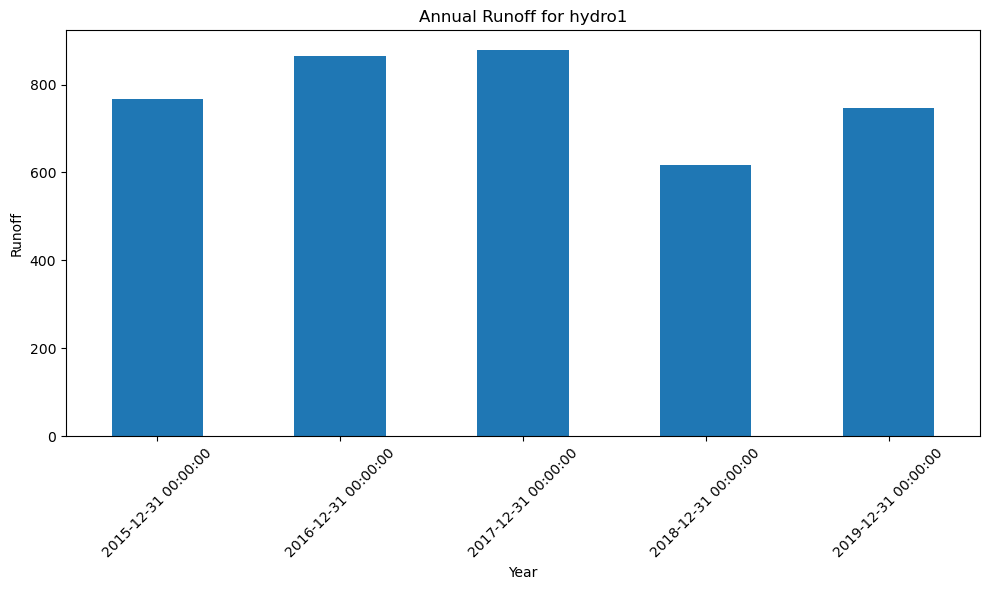

Processing file: hydro2.csv


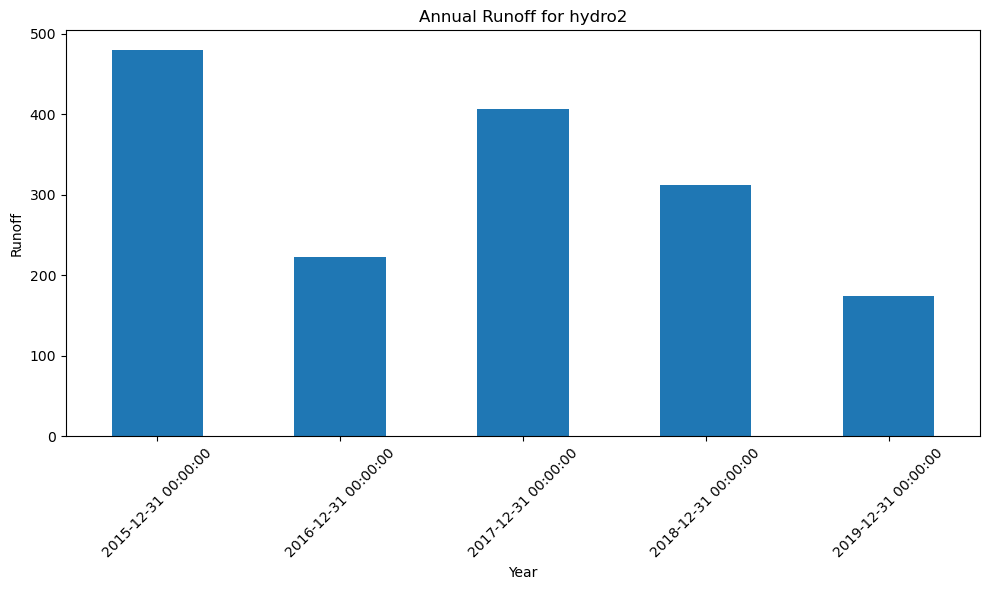

Processing file: hydro3.csv


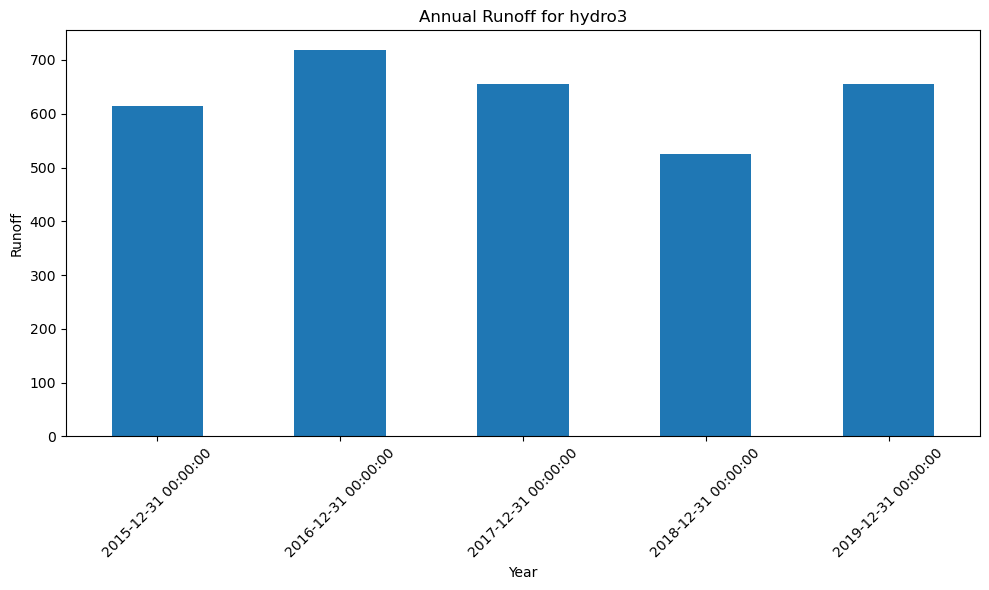

Processing file: hydro4.csv


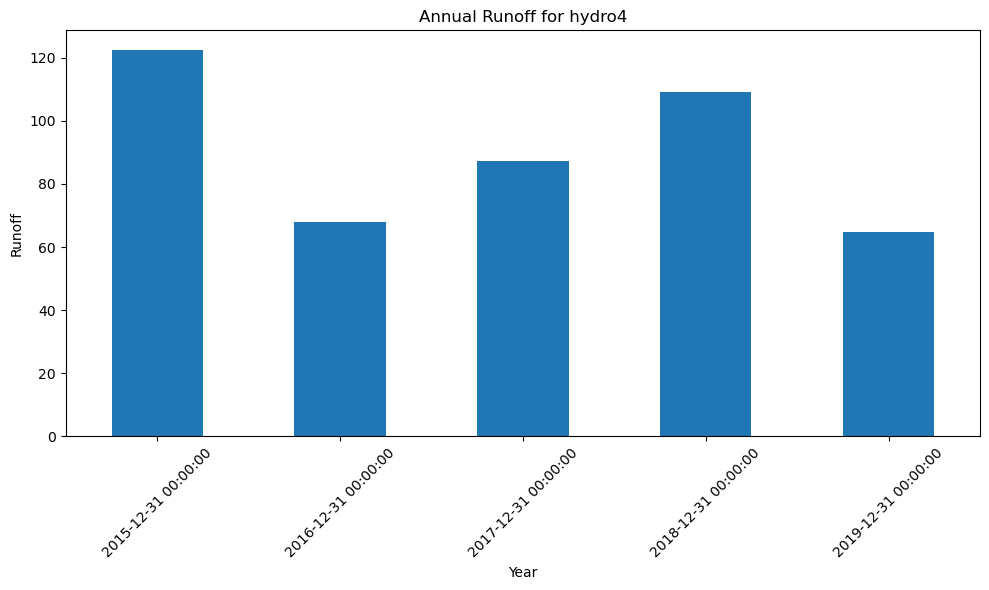

Processing file: hydro5.csv


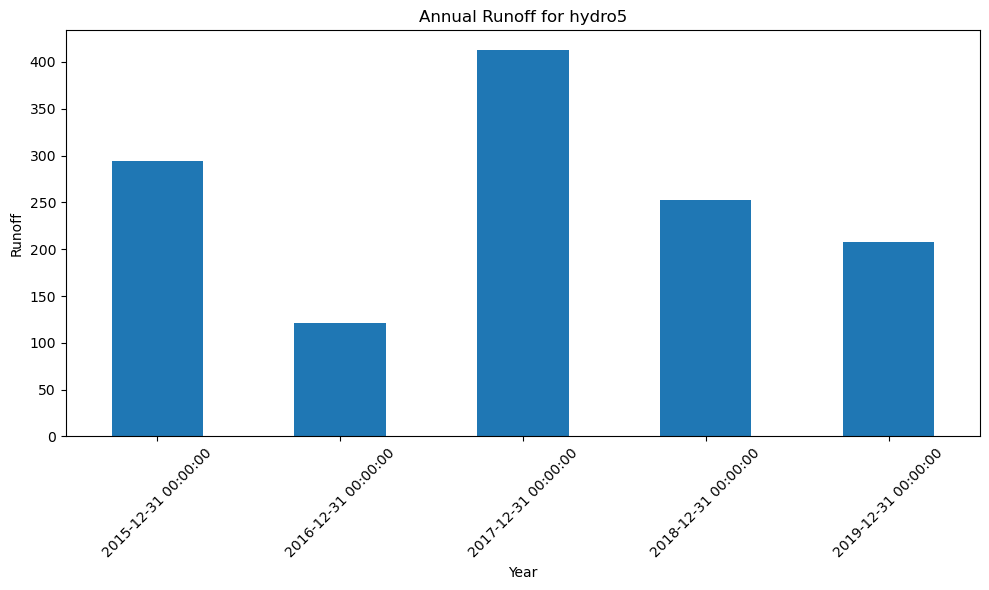

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the CSV files are stored
input_dir = '../../data/hydro'

# Loop over each CSV file in the directory to analyze and plot annual runoff
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        print(f'Processing file: {filename}')

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Manually construct the datetime string and convert it
        df['DATE'] = pd.to_datetime(df['YYY'].astype(str) + '-' +
                                    df['MM'].astype(str).str.zfill(2) + '-' +
                                    df['DD'].astype(str).str.zfill(2) + ' ' +
                                    df['HH'].astype(str).str.zfill(2) + ':00:00')

        # Set DATE as the index
        df.set_index('DATE', inplace=True)

        # Assuming runoff data is in 'RUNOFF' column and already in liters
        # Group by year and sum the runoff
        annual_runoff = df['RUNOFF'].resample('Y').sum()

        # Plot the annual runoff
        plt.figure(figsize=(10, 6))
        annual_runoff.plot(kind='bar')
        plt.title(f'Annual Runoff for {filename[:-4]}')  # Remove .csv from filename for title
        plt.xlabel('Year')
        plt.ylabel('Runoff')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()  # Or show the plot interactively
        
        plt.close()  # Close the plot to free memory for the next iteration


Processing file: hydro1.csv


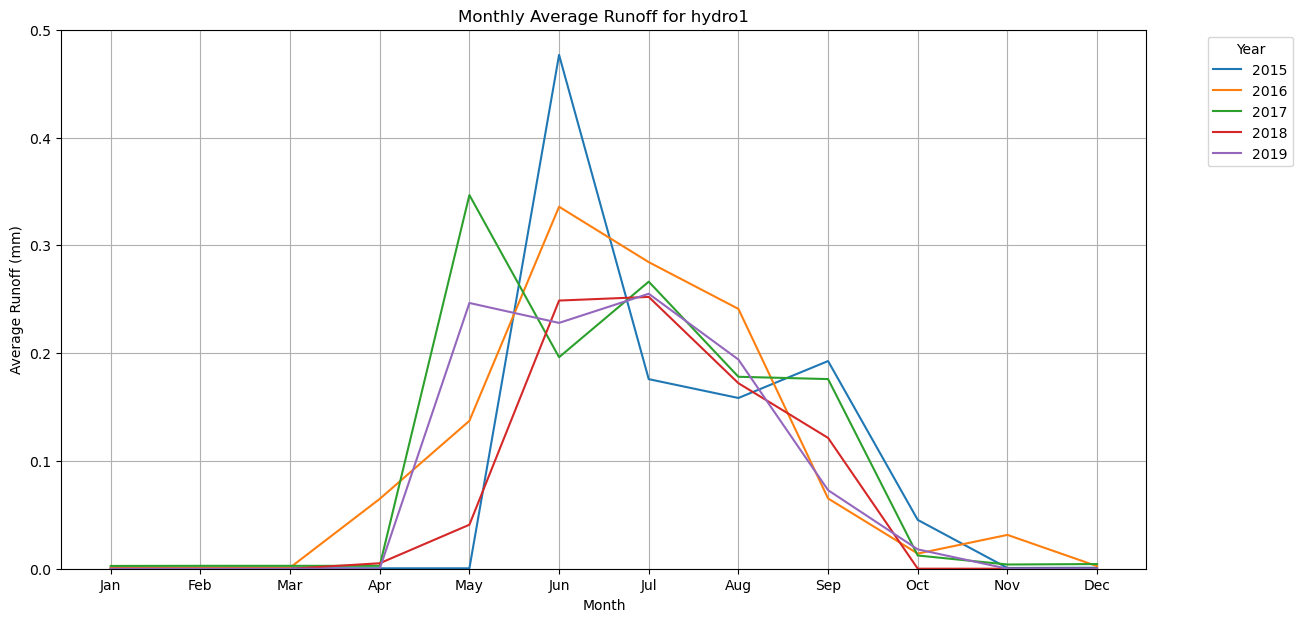

Processing file: hydro2.csv


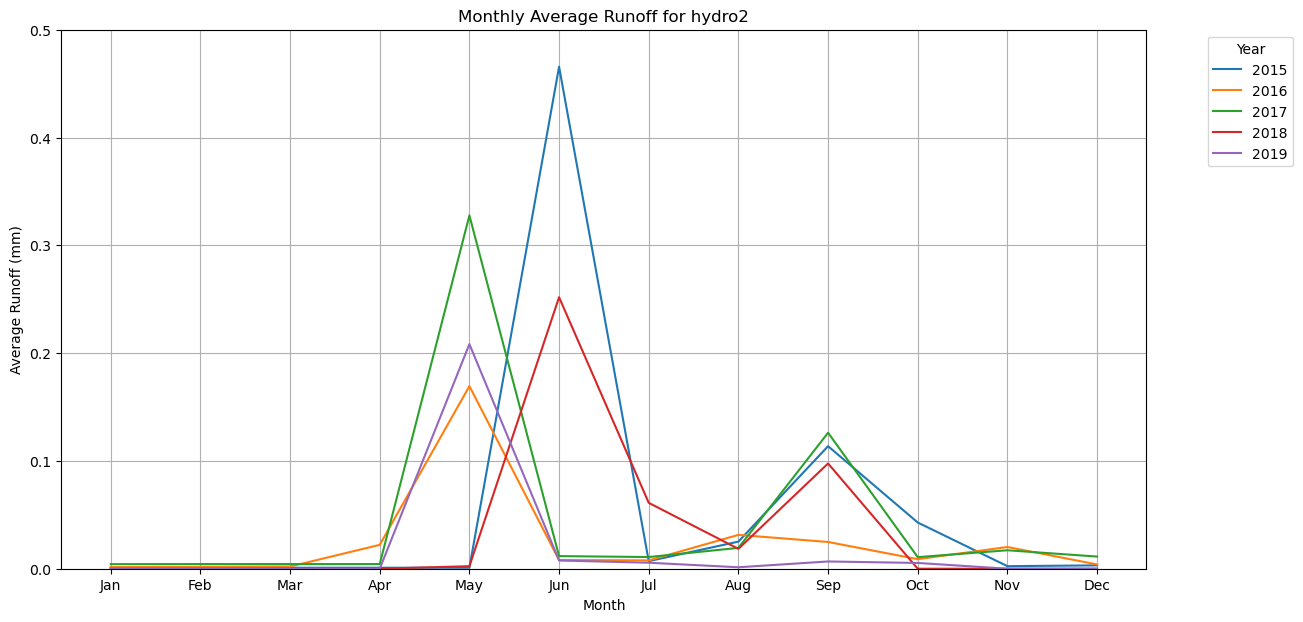

Processing file: hydro3.csv


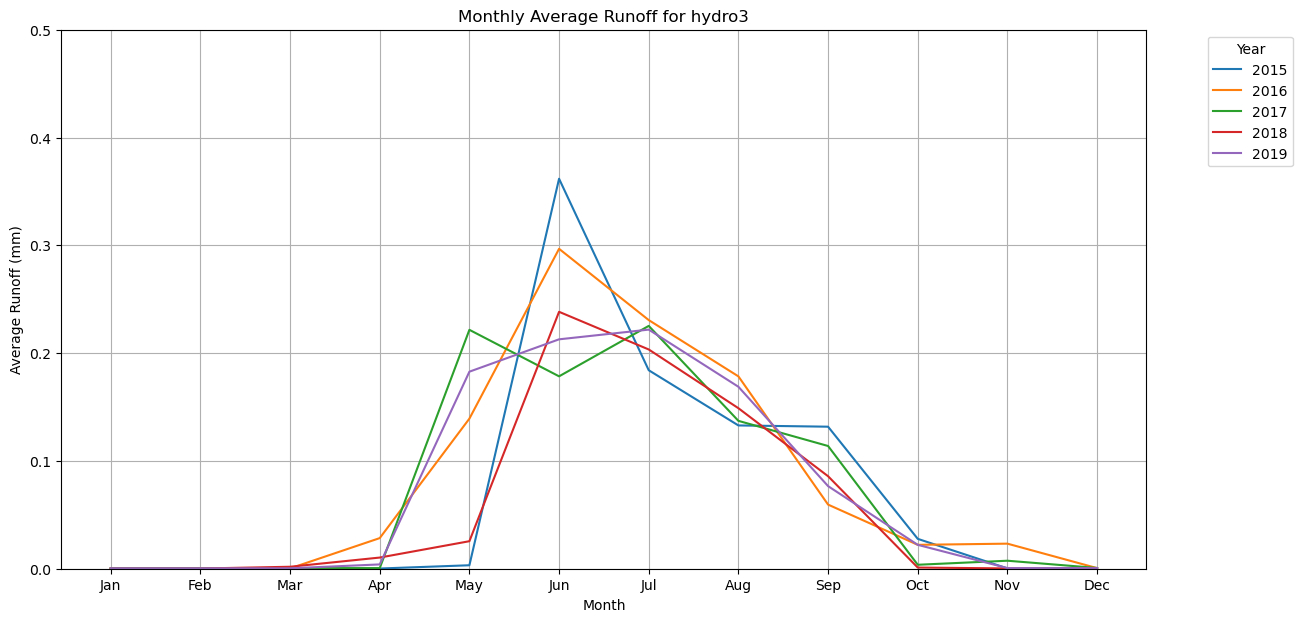

Processing file: hydro4.csv


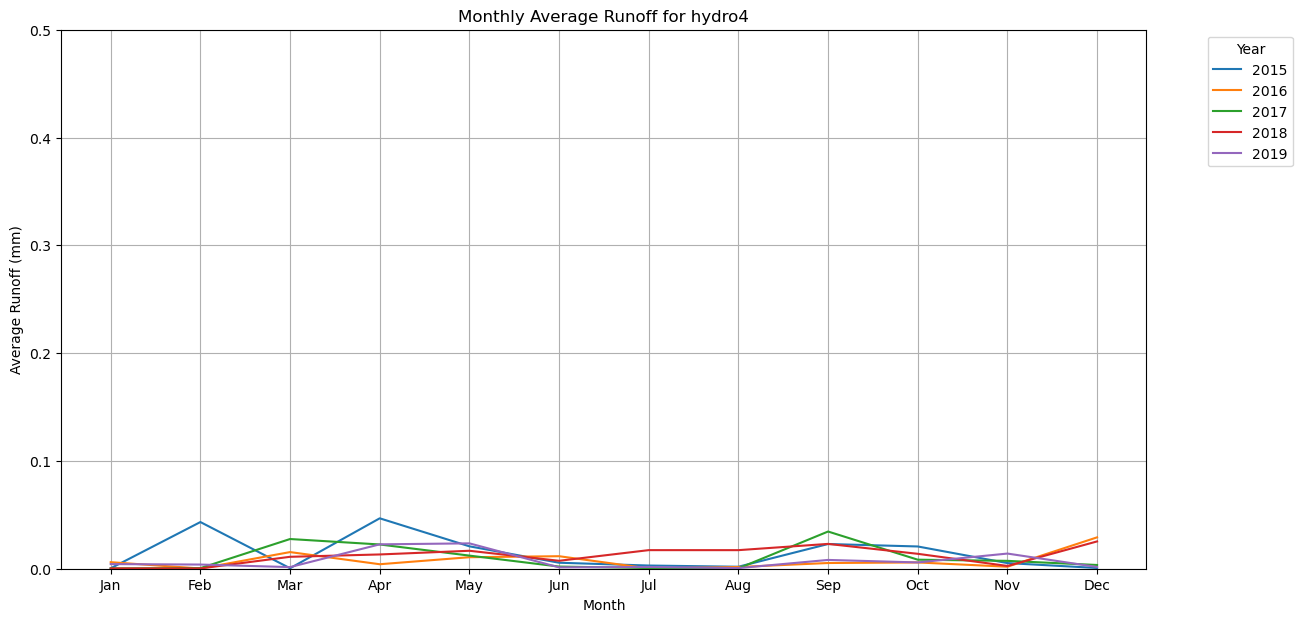

Processing file: hydro5.csv


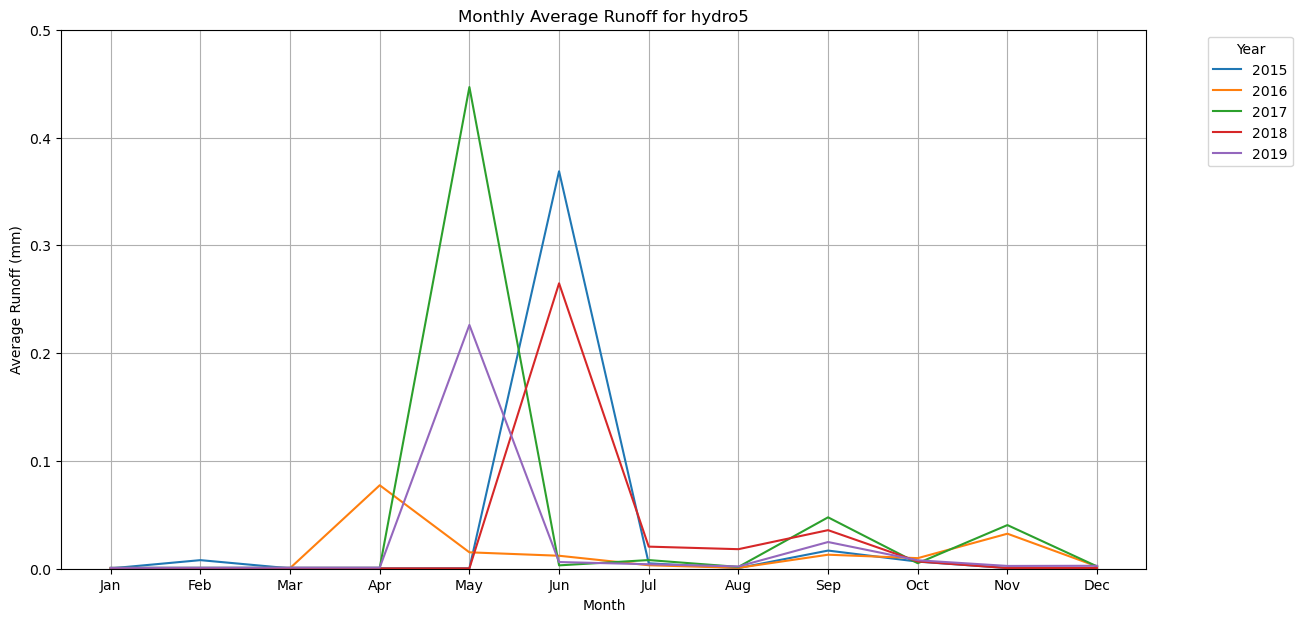

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory where the CSV files are stored
input_dir = '../../data/hydro'

# Loop over each CSV file in the directory to analyze and plot monthly average runoff per year
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        print(f'Processing file: {filename}')

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Manually construct the datetime string and convert it
        df['DATE'] = pd.to_datetime(df['YYY'].astype(str) + '-' +
                                    df['MM'].astype(str).str.zfill(2) + '-' +
                                    df['DD'].astype(str).str.zfill(2) + ' ' +
                                    df['HH'].astype(str).str.zfill(2) + ':00:00')

        # Set DATE as the index
        df.set_index('DATE', inplace=True)

        # Resample to get monthly average runoff
        monthly_avg_runoff = df['RUNOFF'].resample('M').mean()

        # Plotting
        plt.figure(figsize=(14, 7))
        for year in monthly_avg_runoff.index.year.unique():
            # Filter data for each year and plot
            yearly_data = monthly_avg_runoff[monthly_avg_runoff.index.year == year]
            plt.plot(yearly_data.index.month, yearly_data.values, label=str(year))

        plt.title(f'Monthly Average Runoff for {filename[:-4]}')  # Remove .csv for title
        plt.xlabel('Month')
        plt.ylabel('Average Runoff (mm)')
        plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.grid(True)
        plt.ylim(0, 0.5)  # Set the y-axis range from 0 to 0.5

        plt.show()  # Or show the plot interactively

        plt.close()  # Close the plot to free memory for the next iteration

In [6]:
pip install cartopy geopy

Note: you may need to restart the kernel to use updated packages.


Distance from hydro1 to Narsaq: 64.68 km
Distance from hydro2 to Narsaq: 61.11 km
Distance from hydro3 to Narsaq: 64.42 km
Distance from hydro4 to Narsaq: 39.49 km
Distance from hydro5 to Narsaq: 117.92 km


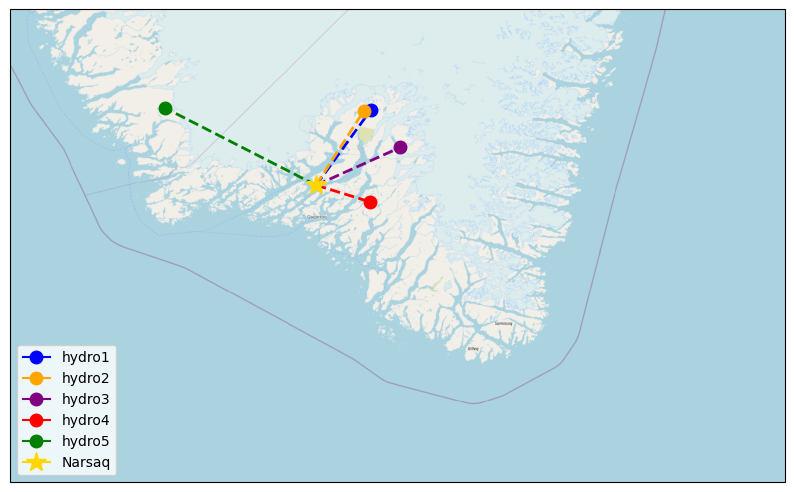

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
from geopy.distance import geodesic
import os

# Define the directory where the CSV files are stored
input_dir = '../../data/hydro'

# Narsaq coordinates
narsaq_coords = (60.9167, -46.0500)  # (latitude, longitude)

# Initialize an empty DataFrame to hold hydro locations from all files
hydro_locations = pd.DataFrame(columns=['NAME', 'stLAT', 'stLON'])

# Loop through each file and collect hydro location data
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)
        # Assuming the data format includes headers and the columns 'stLAT' and 'stLON'
        hydro_locations = pd.concat([hydro_locations, df[['NAME', 'stLAT', 'stLON']]], ignore_index=True)

# Remove duplicates if any file overlaps in hydro plant data
hydro_locations.drop_duplicates(inplace=True)

# Initialize a map with the OpenStreetMap tiles
osm_tiles = OSM()
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1, projection=osm_tiles.crs)
ax.set_extent([-50, -40, 59, 62], crs=ccrs.PlateCarree())  # You might need to adjust this for a better fit
ax.add_image(osm_tiles, 8)  # The zoom level is set to 8 here for better resolution

# Use a different color for each hydro location
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot each hydro location, draw a line to Narsaq, and compute the distance
for index, row in hydro_locations.iterrows():
    hydro_coords = (row['stLAT'], row['stLON'])
    color = colors[index % len(colors)]  # Cycle through colors
    ax.plot(hydro_coords[1], hydro_coords[0], marker='o', color=color, markersize=9, transform=ccrs.PlateCarree(), label=row['NAME'])
    ax.plot([narsaq_coords[1], hydro_coords[1]], [narsaq_coords[0], hydro_coords[0]], color=color, linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
    
    # Compute and print the distance to Narsaq
    distance = geodesic(narsaq_coords, hydro_coords).kilometers
    print(f"Distance from {row['NAME']} to Narsaq: {distance:.2f} km")

# Plot Narsaq with a distinct marker
ax.plot(narsaq_coords[1], narsaq_coords[0], marker='*', color='gold', markersize=15, transform=ccrs.PlateCarree(), label='Narsaq')

# Add a legend to the map
plt.legend(loc='lower left')

# Show the map
plt.show()


### Let's try to see if the data from the MAR is similar to the one provided on 'https://hydropower.gl/?sc_lang=en'

In [8]:
import pandas as pd

def calculate_average_annual_runoff_in_hm3(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    df['DATE'] = pd.to_datetime(df['YYY'].astype(str) + '-' +
                                    df['MM'].astype(str).str.zfill(2) + '-' +
                                    df['DD'].astype(str).str.zfill(2) + ' ' +
                                    df['HH'].astype(str).str.zfill(2) + ':00:00')

    # Set DATE as the index
    df.set_index('DATE', inplace=True)

    # Sum up the runoff data for each year (assuming runoff is in l/m²)
    annual_runoff_l_per_m2 = df['RUNOFF'].resample('A').sum()

    # Convert annual runoff from l/m² to liters over the entire 25 km² area
    area_m2 = 25 * 1e6  # 25 km² to m²
    annual_runoff_liters = annual_runoff_l_per_m2 * area_m2

    # Finally, convert the total annual runoff from liters to cubic hectometers (hm³)
    annual_runoff_hm3 = annual_runoff_liters / 1e8  # 1 hm³ = 100,000,000 liters

    # Calculate the average annual runoff in hm³
    average_annual_runoff_hm3 = annual_runoff_hm3.mean()

    return average_annual_runoff_hm3

### Hydro1+ Hydro2
#### 2 catchment areas for 1 power plant
from 'https://hydropower.gl/?sc_lang=en':  
Average yearly runoff (hm3): (Not available)  
Estimated Production Potential (GWh): (Not available)  
Reservoir Size (hm3): (Not available)  
Catchment Precipitation (km2): (Not available)  
Power Plant Effect (MW): (Not available)    
Power Plant Head (m): (Not available)    
Required Dam Height (m): (Not available)  
Horizontal distance from intake to outlet (m):(Not available)  
Distance to nearest town (km): (Not available)  

In [9]:
file_path = '../../data/hydro/hydro1.csv'

average_yearly_runoff_hm3_hydro1 = calculate_average_annual_runoff_in_hm3(file_path)
print(f"The average yearly runoff for hydro1 is {average_yearly_runoff_hm3_hydro1:.2f} hm³ \n")

file_path = '../../data/hydro/hydro2.csv'

average_yearly_runoff_hm3_hydro2 = calculate_average_annual_runoff_in_hm3(file_path)
print(f"The average yearly runoff for hydro2 is {average_yearly_runoff_hm3_hydro2:.2f} hm³\n\n")

average_yearly_runoff_hm3_hydro1_2 = average_yearly_runoff_hm3_hydro1+average_yearly_runoff_hm3_hydro2
print(f"The average yearly runoff for hydro1+hydro2 is {average_yearly_runoff_hm3_hydro1_2:.2f} hm³")

The average yearly runoff for hydro1 is 193.75 hm³ 

The average yearly runoff for hydro2 is 79.83 hm³


The average yearly runoff for hydro1+hydro2 is 273.57 hm³


### Hydro3
from 'https://hydropower.gl/?sc_lang=en':  
Average yearly runoff (hm3): 905 based on data from: (Not available)  
Estimated Production Potential (GWh): 148  
Reservoir Size (hm3): 585  
Catchment Precipitation (km2): 434  
Power Plant Effect (MW): 30  
Power Plant Head (m): 110  
Required Dam Height (m): (Not available)  
Horizontal distance from intake to outlet (m): 9000  
Distance to nearest town (km): 65  

In [10]:
file_path = '../../data/hydro/hydro3.csv'

average_yearly_runoff_hm3 = calculate_average_annual_runoff_in_hm3(file_path)
print(f"The average yearly runoff for hydro3 is {average_yearly_runoff_hm3:.2f} hm³")

The average yearly runoff for hydro3 is 158.53 hm³


### Hydro4
Average yearly runoff (hm3): (Not available)  
Estimated Production Potential (GWh): 6  
Reservoir Size (hm3): (Not available)  
Catchment Precipitation (km2): 60    
Power Plant Effect (MW): 1.2      
Power Plant Head (m): 120      
Required Dam Height (m): (Not available)  
Horizontal distance from intake to outlet (m):1700  
Distance to nearest town (km): 45

In [11]:
file_path = '../../data/hydro/hydro4.csv'

average_yearly_runoff_hm3 = calculate_average_annual_runoff_in_hm3(file_path)
print(f"The average yearly runoff for hydro4 is {average_yearly_runoff_hm3:.2f} hm³")

The average yearly runoff for hydro4 is 22.59 hm³


### Hydro5
from 'https://hydropower.gl/?sc_lang=en':  
Average yearly runoff (hm3): 375 based on data from: (Not available)  
Estimated Production Potential (GWh): 467.5  
Reservoir Size (hm3): 350  
Catchment Precipitation (km2): 155  
Power Plant Effect (MW): 58  
Power Plant Head (m): 510  
Required Dam Height (m): (Not available)  
Horizontal distance from intake to outlet (m): 5900  
Distance to nearest town (km): (Not available)  

In [12]:
file_path = '../../data/hydro/hydro5.csv'

average_yearly_runoff_hm3 = calculate_average_annual_runoff_in_hm3(file_path)
print(f"The average yearly runoff for hydro5 is {average_yearly_runoff_hm3:.2f} hm³")

The average yearly runoff for hydro5 is 64.43 hm³


In [13]:
import pandas as pd

def calculate_flow_rate(runoff_liters_per_m2, area_km2, time_period_hours):
    area_m2 = area_km2 * 1e6  # Convert area from square kilometers to square meters
    total_runoff_liters = runoff_liters_per_m2 * area_m2
    total_runoff_m3 = total_runoff_liters / 1000  # Convert liters to cubic meters

    # Assuming the runoff is an average over the time period
    flow_rate_m3_per_s = total_runoff_m3 / (time_period_hours * 3600)  # Convert hours to seconds

    return flow_rate_m3_per_s

# Example usage:
runoff = 1  # liters per square meter
area = 25  # square kilometers
time_period = 24  # hours (if the runoff data is daily average)
flow_rate = calculate_flow_rate(runoff, area, time_period)
print(f"The average flow rate for a day is {flow_rate:.3f} m³/s")


The average flow rate for a day is 0.289 m³/s


In [14]:
def process_runoff_data(file_paths, area_km2=25):
    import pandas as pd

    # Placeholder for combined DataFrame
    combined_df = pd.DataFrame()

    for file_path in file_paths:
        # Assuming each file has a 'runoff' column in liters per m²
        df = pd.read_csv(file_path)
        # Convert liters per m² to m³ (1 liter = 0.001 m³)
        df['runoff_m3'] = df['RUNOFF'] * 0.001 * area_km2 * 1000000
        combined_df = pd.concat([combined_df, df['runoff_m3']], ignore_index=True)
    
    # Assuming the combined data needs to be summed up for each hour across all files
    # If the data is sequential rather than needing aggregation, this step can be adjusted
    hourly_runoff = combined_df.groupby(combined_df.index // 1).sum()  # Adjust if each entry isn't hourly

    # Output to 'inflow_series.csv'
    output_path = '../../data/inflow_series.csv'
    hourly_runoff.to_csv(output_path, header=False, index=False)

    return output_path

# Placeholder paths for demonstration; will replace with actual file paths once uploaded
file_paths = ['../../data/hydro/hydro1.csv', '../../data/hydro/hydro2.csv']
output_file_path = process_runoff_data(file_paths)

In [15]:
import pandas as pd
def calculate_average_annual_runoff_in_hm3_adjusted(file_path):
    # Load the CSV file, assuming the first column contains runoff data in m³ and there's no header
    df = pd.read_csv(file_path, header=None, names=['runoff_m3'])

    # Convert from m³ to hm³ (1 hm³ = 100,000 m³)
    df['runoff_hm3'] = df['runoff_m3'] / 1e5

    # Assuming each row represents an hourly measurement, calculate the total annual runoff in hm³
    # Generate a date range to associate each hourly measurement with a timestamp
    df.index = pd.date_range(start='2015-01-01', periods=len(df), freq='H')  # Adjust the start date as needed

    # Sum up the runoff data for each year
    annual_runoff_hm3 = df['runoff_hm3'].resample('A').sum()

    # Calculate the average annual runoff in hm³
    average_annual_runoff_hm3 = annual_runoff_hm3.mean()

    return average_annual_runoff_hm3

In [16]:
file_path = '../../data/inflow_series.csv'

average_yearly_runoff_hm3_hydro1 = calculate_average_annual_runoff_in_hm3_adjusted(file_path)
print(f"The average yearly runoff for hydro1 is {average_yearly_runoff_hm3_hydro1:.2f} hm³ \n")

The average yearly runoff for hydro1 is 136.79 hm³ 



In [18]:
def create_inflow_series_and_calculate_runoff(file_path_1, file_path_2):
    import pandas as pd

    # Load the two files
    df1 = pd.read_csv(file_path_1)
    df2 = pd.read_csv(file_path_2)
    
    df1['RUNOFF'] = pd.to_numeric(df1['RUNOFF'], errors='coerce')
    df2['RUNOFF'] = pd.to_numeric(df2['RUNOFF'], errors='coerce')

    # Sum the runoff values from both files, convert from liters per m² to m³ for the 25km² area
    # Note: 1 liter = 0.001 m³, and the area is 25 km² = 25 * 1,000,000 m²
    # Convert final values to TCM by dividing by 1,000 (since 1 TCM = 1,000 m³)
    total_runoff_tcm = (df1['RUNOFF'] + df2['RUNOFF']) * 0.001 * (25 * 1e6) / 1e3  
    
    # Create a new DataFrame for the combined runoff in m³
    inflow_series_df = pd.DataFrame(total_runoff_tcm)

    # Save the combined runoff data to 'inflow_series.csv'
    inflow_series_path = '../../data/inflow_series_03h.csv'
    inflow_series_df.to_csv(inflow_series_path, header=False, index=False)
    
    df3 = pd.read_csv('../../data/inflow_series_03h.csv')
    print(df3)
    print("DataFrame saved successfully.")
    
    # Now, calculate the average annual runoff in hm³ from the newly created 'inflow_series.csv'
    # Reuse the provided function with slight adjustments for direct calculation
    inflow_series_df['DATE'] = pd.date_range(start='2015-01-01', periods=len(inflow_series_df), freq='H')
    inflow_series_df.set_index('DATE', inplace=True)
    
    # Convert m³ to hm³ for calculation (1 hm³ = 100,000 m³)
    annual_runoff_hm3 = inflow_series_df.resample('A').sum() / 1e5
    average_annual_runoff_hm3 = annual_runoff_hm3.mean()

    return inflow_series_path, average_annual_runoff_hm3

# Placeholder file paths, replace 'file_path_1' and 'file_path_2' with actual paths
file_path_1 = '../../data/hydro/hydro1.csv'
file_path_2 = '../../data/hydro/hydro2.csv'
create_inflow_series_and_calculate_runoff(file_path_1, file_path_2)

       0.03225
0       0.0325
1       0.0325
2       0.0325
3       0.0325
4       0.0325
...        ...
43818   0.0000
43819   0.0000
43820   0.0000
43821   0.0000
43822   0.0000

[43823 rows x 1 columns]
DataFrame saved successfully.


('../../data/inflow_series_03h.csv',
 RUNOFF    0.273573
 dtype: float64)

In [19]:
def create_inflow_series_and_calculate_runoff(input_file_path, output_file_path):
    import pandas as pd

    # Load the file
    df = pd.read_csv(input_file_path)
    
    # Ensure 'RUNOFF' is numeric
    df['RUNOFF'] = pd.to_numeric(df['RUNOFF'], errors='coerce')

    # Convert the runoff values from liters per m² to m³ for the 25km² area
    # Note: 1 liter = 0.001 m³, and the area is 25 km² = 25 * 1,000,000 m²
    # Convert final values to TCM by dividing by 1,000 (since 1 TCM = 1,000 m³)    
    total_runoff_m3 = df['RUNOFF'] * 0.001 * (25 * 1e6) / 1e3
    
    # Create a new DataFrame for the runoff in m³
    inflow_series_df = pd.DataFrame(total_runoff_m3)

    # Save the runoff data to the specified output file path
    inflow_series_df.to_csv(output_file_path, header=False, index=False)
    
    # Confirm the file has been saved
    print(f"DataFrame saved successfully to {output_file_path}.")
    
    # Load the saved data for further processing
    df = pd.read_csv(output_file_path)
    
    # Adding a DATE column for resampling, assuming a hourly frequency starting from 2015-01-01
    df['DATE'] = pd.date_range(start='2015-01-01', periods=len(df), freq='H')
    df.set_index('DATE', inplace=True)
    
    # Convert m³ to hm³ for calculation (1 hm³ = 100,000 m³)
    annual_runoff_hm3 = df.resample('A').sum() / 1e5
    average_annual_runoff_hm3 = annual_runoff_hm3.mean()

    return output_file_path, average_annual_runoff_hm3


In [20]:
file_path = '../../data/hydro/hydro3.csv'
output_file_path = '../../data/inflow_series_03j.csv'

create_inflow_series_and_calculate_runoff(file_path, output_file_path)

file_path = '../../data/hydro/hydro5.csv'
output_file_path = '../../data/inflow_series_05h.csv'

create_inflow_series_and_calculate_runoff(file_path, output_file_path)

DataFrame saved successfully to ../../data/inflow_series_03j.csv.
DataFrame saved successfully to ../../data/inflow_series_05h.csv.


('../../data/inflow_series_05h.csv',
 0.00825    0.064429
 dtype: float64)